# Generating plots for the paper, using the data from the experiments

In [1]:
# read in all the files ending on .npy in the directory: 

path = "./results_training_run2_Adams/experiment_results/"
import os
import numpy as np

files = os.listdir(path)
files = [f for f in files if f.endswith(".npy")]
# there are always 3 files per experiment ending with "_mean.npy", "_min.npy" and "_max.npy"
# read them in and store them as a triplet

experiments = {}
for f in files:
    if f.endswith("_mean.npy"):
        # read in the mean file
        mean = np.load(path+f,allow_pickle=True).item()
        # read in the min file
        min = np.load(path+f[:-8]+"min.npy",allow_pickle=True).item()
        # read in the max file
        max = np.load(path+f[:-8]+"max.npy",allow_pickle=True).item()
        desc = f.split("_mean")[0]
        experiments[desc] = (mean,min,max)

for key in experiments.keys():
    
    # compute mean of the last 5 epochs
    mean = np.mean(experiments[key][0]["val_acc_top1"][-5:])
    min = np.mean(experiments[key][1]["val_acc_top1"][-5:])
    max = np.mean(experiments[key][2]["val_acc_top1"][-5:])
    #print(key,mean,min,max)
    print(key,mean," spread: ",max-min)


# for the key: "r_model" run remove the last 10 epochs from the tracking since it was trained for 25 epochs and others for only 15 epochs
experiments["r_model"][0]["val_acc_top1"] = experiments["r_model"][0]["val_acc_top1"][:-10]
experiments["r_model"][1]["val_acc_top1"] = experiments["r_model"][1]["val_acc_top1"][:-10]
experiments["r_model"][2]["val_acc_top1"] = experiments["r_model"][2]["val_acc_top1"][:-10]
# also do for train_loss
experiments["r_model"][0]["train_loss"] = experiments["r_model"][0]["train_loss"][:-10]
experiments["r_model"][1]["train_loss"] = experiments["r_model"][1]["train_loss"][:-10]
experiments["r_model"][2]["train_loss"] = experiments["r_model"][2]["train_loss"][:-10]


euclid_model_num_clusters_10 62.953599999999994  spread:  15.459999999999994
euclid_model_num_models_10 63.495999999999995  spread:  15.959999999999994
fourier_model_num_layers_2 60.522000000000006  spread:  14.52000000000001
euclid_model_num_models_20 63.36999999999999  spread:  13.979999999999983
euclid_model_num_clusters_3 64.3664  spread:  14.960000000000015
fourier_model_num_layers_1 60.14480000000001  spread:  13.920000000000009
euclid_model_num_models_4 63.352  spread:  14.240000000000002
euclid_model_num_clusters_1 59.11279999999998  spread:  15.799999999999997
fourier_model_num_clusters_3 64.3084  spread:  14.83999999999999
fourier_model_num_layers_10 63.81519999999999  spread:  15.259999999999991
euclid_model_num_clusters_50 62.511199999999995  spread:  14.899999999999991
euclid_model_num_clusters_30 62.4636  spread:  14.5
euclid_model_num_layers_2 60.42479999999998  spread:  16.0
fourier_model_num_clusters_10 64.5372  spread:  14.200000000000003
fourier_model_num_layers_17 6

In [2]:
# find the experiment with the highest mean accuracy
max_mean = 0
max_mean_key = ""
for key in experiments.keys():
    mean = np.mean(experiments[key][0]["val_acc_top1"][-5:])
    if mean > max_mean:
        max_mean = mean
        max_mean_key = key
print("max mean: ",max_mean_key,max_mean)


# find the experiment with the highest max accuracy
max_max = 0
max_max_key = ""
for key in experiments.keys():
    max = np.mean(experiments[key][2]["val_acc_top1"][-5:])
    if max > max_max:
        max_max = max
        max_max_key = key
print("max max: ",max_max_key,max_max)




max mean:  fourier_model_num_clusters_2 64.7544
max max:  fourier_model_num_clusters_2 73.94


In [3]:
# create mean and max dict to sort the experiments: 

mean_dict = {}
max_dict = {}

for key in experiments.keys():
    mean = np.mean(experiments[key][0]["val_acc_top1"][-5:])
    max = np.mean(experiments[key][2]["val_acc_top1"][-5:])
    mean_dict[key] = mean
    max_dict[key] = max

# sort the experiments by mean and max accuracy in an descending order and print the first 5
sorted_mean = sorted(mean_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_max = sorted(max_dict.items(), key=lambda kv: kv[1],reverse=True)

print("sorted by mean: ")
for i in range(5):
    print(sorted_mean[i])
print("sorted by max: ")
for i in range(5):
    print(sorted_max[i])


sorted by mean: 
('fourier_model_num_clusters_2', 64.7544)
('euclid_model_num_clusters_2', 64.684)
('fourier_model_num_clusters_10', 64.5372)
('euclid_model_num_clusters_3', 64.3664)
('fourier_model_num_clusters_3', 64.3084)
sorted by max: 
('fourier_model_num_clusters_2', 73.94)
('euclid_model_num_clusters_3', 73.32000000000001)
('fourier_model_num_clusters_50', 72.58)
('fourier_model_num_models_20', 72.48)
('fourier_model_num_clusters_3', 72.39999999999999)


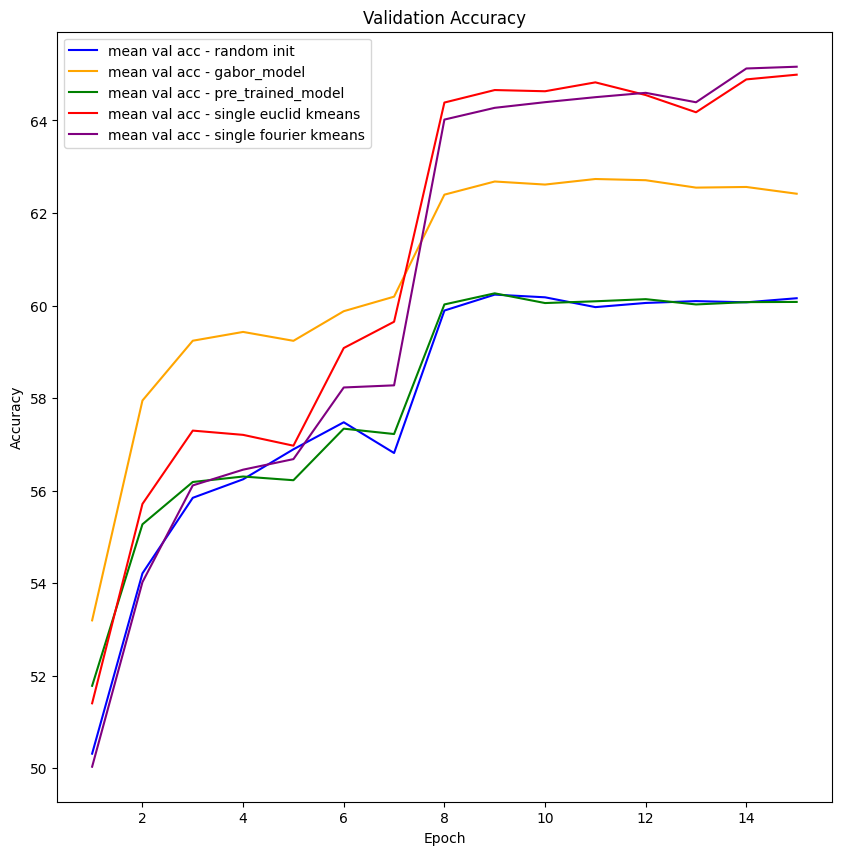

In [4]:
import infrastructure as inf
# comparing the best experiments with the baseline:

# using highest mean to get the params for the single filter clustering experiment:
plot1_dict_mean = {}

plot1_dict_mean["random init"] = experiments["r_model"]
plot1_dict_mean["gabor_model"] = experiments["gabor_model"]
plot1_dict_mean["pre_trained_model"] = experiments["pre_trained_model"]
plot1_dict_mean["single euclid kmeans"] = experiments["euclid_model_num_clusters_2"]
plot1_dict_mean["single fourier kmeans"] = experiments["fourier_model_num_clusters_2"]

plot_path = "./results_training_run2_Adams/plots/plot1_single_filter_clustering_by_mean"
inf.plot_trainings_mean_min_max(plot1_dict_mean,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=False)

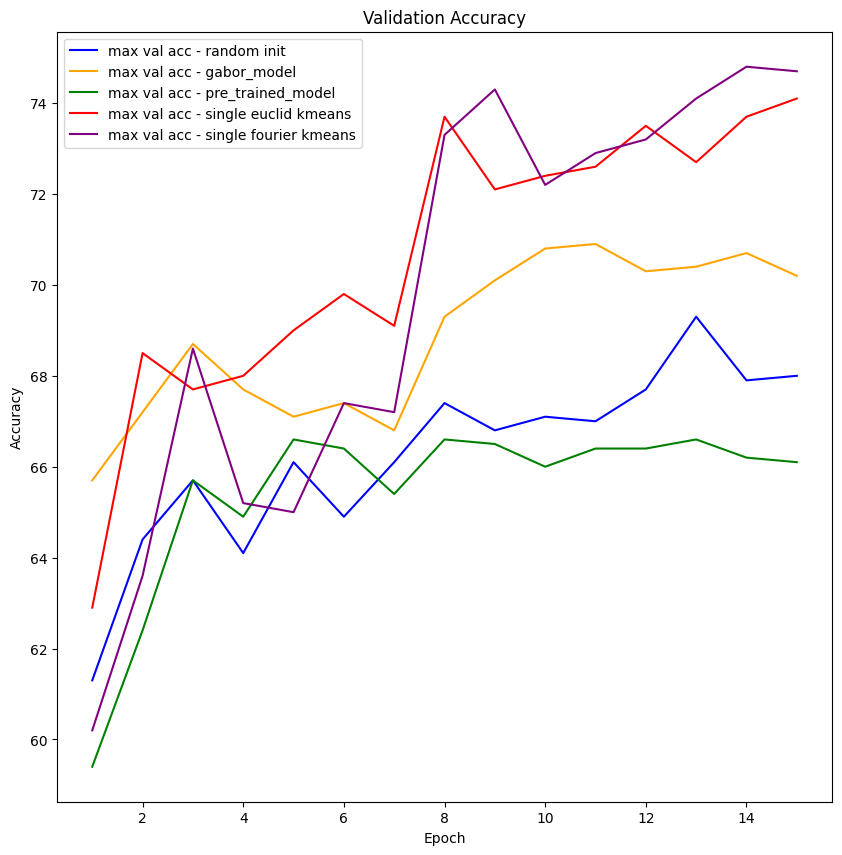

In [5]:
# comparing the best experiments with the baseline:

# using highest mean to get the params for the single filter clustering experiment:
plot1_dict_max = {}

plot1_dict_max["random init"] = experiments["r_model"]
plot1_dict_max["gabor_model"] = experiments["gabor_model"]
plot1_dict_max["pre_trained_model"] = experiments["pre_trained_model"]
plot1_dict_max["single euclid kmeans"] = experiments["euclid_model_num_clusters_3"]
plot1_dict_max["single fourier kmeans"] = experiments["fourier_model_num_clusters_2"]

plot_path = "./results_training_run2_Adams/plots/plot1_single_filter_clustering_by_max"
inf.plot_trainings_mean_min_max(plot1_dict_max,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=True)

# Plot 2: More detailed experiments for single filter fourier clustering

## Num of models used to generate clustering:

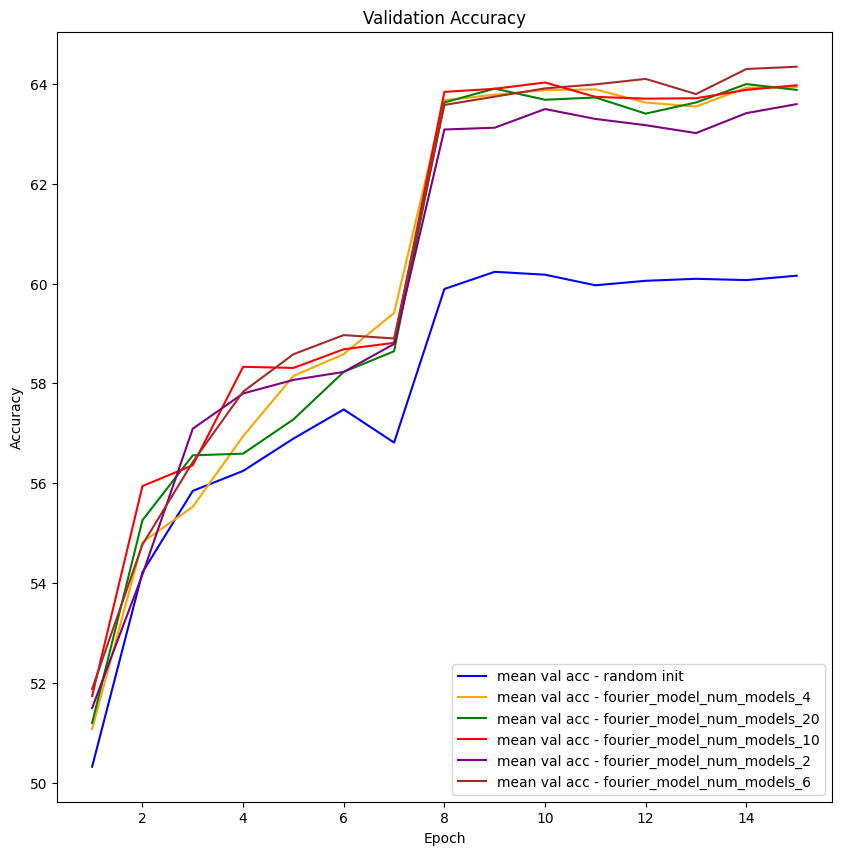

In [6]:
# comparing the best experiments with the baseline:

# using highest mean to get the params for the single filter clustering experiment:
plot_dict_models = {}

plot_dict_models["random init"] = experiments["r_model"]
# add all keys that contain "fourier" and "num_models"
for key in experiments.keys():
    if "fourier" in key and "num_models" in key:
        plot_dict_models[key] = experiments[key] 

plot_path = "./results_training_run2_Adams/plots/plot_fourier_num_models"
inf.plot_trainings_mean_min_max(plot_dict_models,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=False)

## Num of clusters centers used to generate clustering:

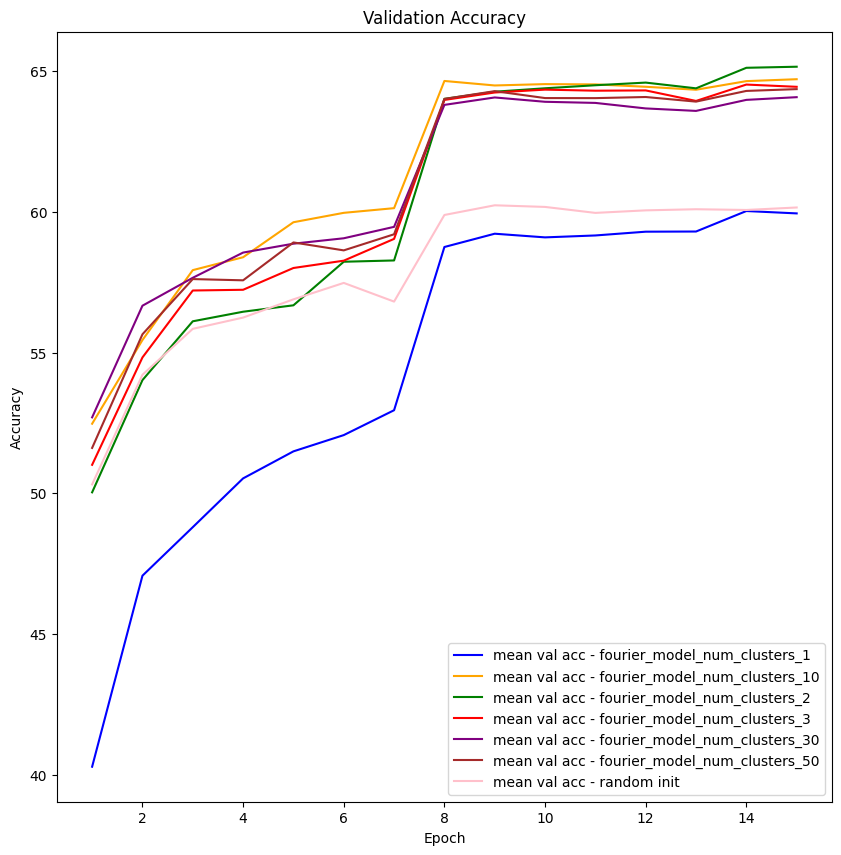

In [7]:
# comparing the best experiments with the baseline:

# using highest mean to get the params for the single filter clustering experiment:
plot_dict_clusters = {}

plot_dict_clusters["random init"] = experiments["r_model"]
# add all keys that contain "fourier" and "num_models"
for key in experiments.keys():
    if "fourier" in key and "num_clusters" in key:
        plot_dict_clusters[key] = experiments[key] 

# sort the dict by keys:
plot_dict_clusters = dict(sorted(plot_dict_clusters.items()))

plot_path = "./results_training_run2_Adams/plots/plot_fourier_num_models"
inf.plot_trainings_mean_min_max(plot_dict_clusters,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=False)

## Num of layers intialized with clustering:

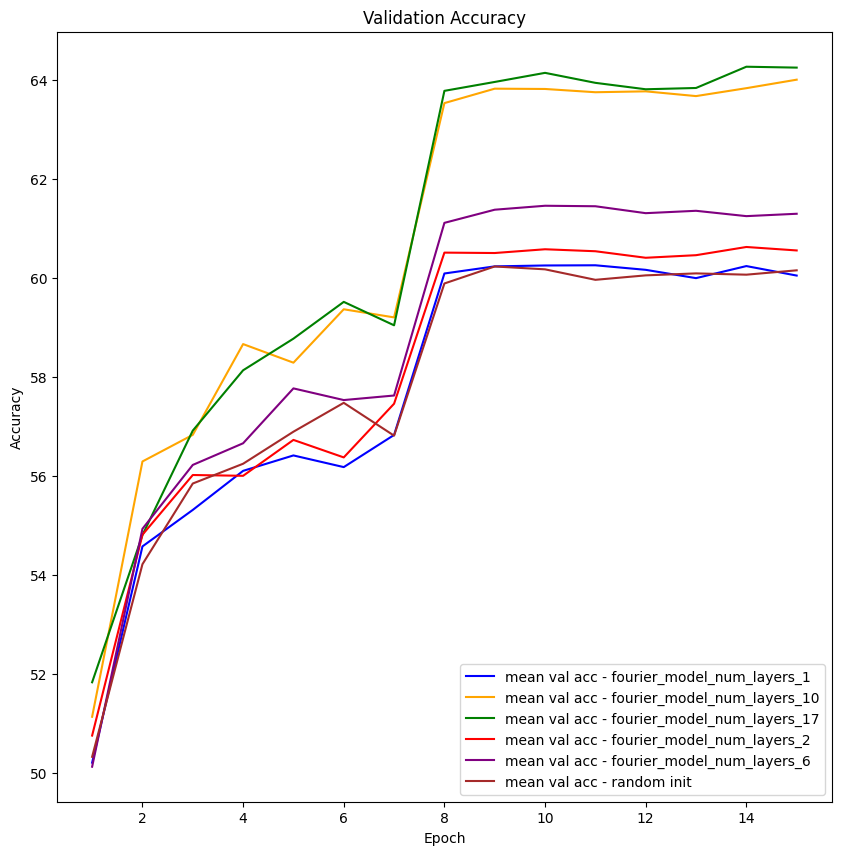

In [8]:
# comparing the best experiments with the baseline:

# using highest mean to get the params for the single filter clustering experiment:
plot_dict_layers = {}

plot_dict_layers["random init"] = experiments["r_model"]
# add all keys that contain "fourier" and "num_models"
for key in experiments.keys():
    if "fourier" in key and "num_layers" in key:
        plot_dict_layers[key] = experiments[key] 

# sort the dict by keys:
plot_dict_layers = dict(sorted(plot_dict_layers.items()))

plot_path = "./results_training_run2_Adams/plots/plot_fourier_num_models"
inf.plot_trainings_mean_min_max(plot_dict_layers,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=False)

## Only first layer intialized with clustering: Gabor vs Euclid vs Fourier

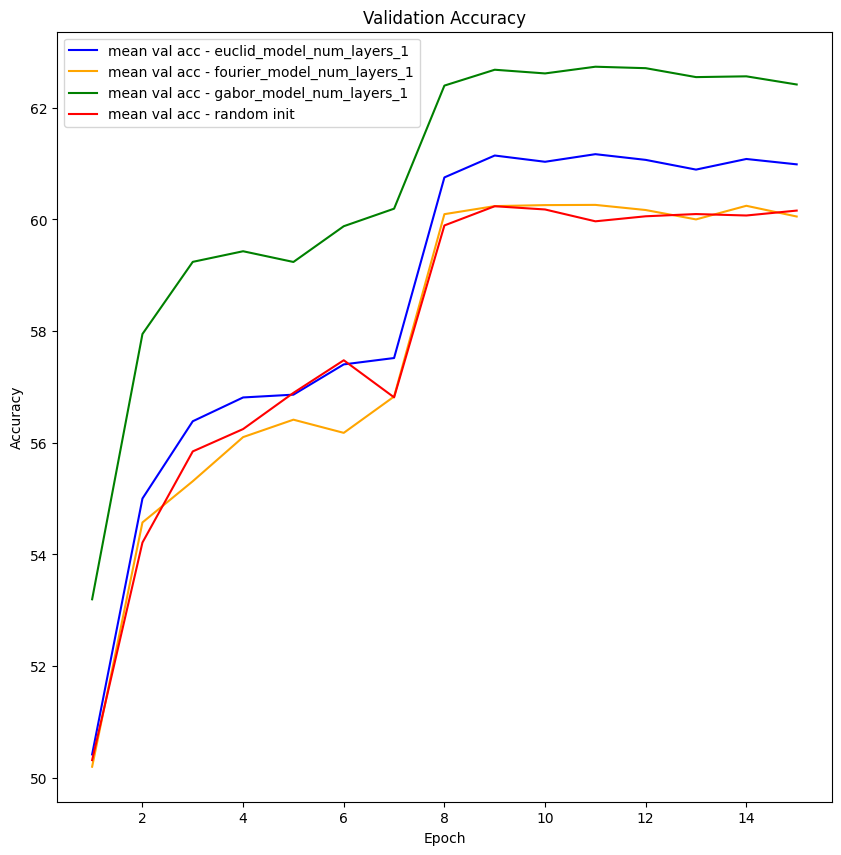

In [9]:
# using highest mean to get the params for the single filter clustering experiment:
plot_dict_layer_1 = {}

plot_dict_layer_1["random init"] = experiments["r_model"]
# add all keys that contain "fourier" and "num_models"
plot_dict_layer_1["fourier_model_num_layers_1"] = experiments["fourier_model_num_layers_1"]
plot_dict_layer_1["euclid_model_num_layers_1"] = experiments["euclid_model_num_layers_1"]
# add gabor
plot_dict_layer_1["gabor_model_num_layers_1"] = experiments["gabor_model"]


# sort the dict by keys:
plot_dict_layer_1 = dict(sorted(plot_dict_layer_1.items()))

plot_path = "./results_training_run2_Adams/plots/plot_fourier_num_models"
inf.plot_trainings_mean_min_max(plot_dict_layer_1,display_train_acc=False,display_only_mean=True,save=True,save_path=plot_path,display=True,display_max_instead_of_mean=False)